## ******************************LIBRARY IMPORTAION***************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## ******DATA SET IMPORTATION AND PREPROCESSING FOR FIRST DATASET******

In [2]:
df_als=pd.read_csv('data/train2-alsfrs.csv')
df_sensor=pd.read_csv('data/train2-sensor.csv')
df_static=pd.read_csv('data/train2-static.csv')


In [3]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})
df_als=df_als.drop('source',axis=1)
df_sensor=df_sensor.dropna()
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
df=merged_df
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape
df1=df.drop([187,188],axis=0)
df1
df=df1
first_=df.iloc[:,:2]
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
187/187 [==============================] - 5s 5ms/step - loss: 1.1062
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.9697
Epoch 3/100
187/187 [==============================] - 1s 3ms/step - loss: 0.9078
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.8751
Epoch 5/100
187/187 [==============================] - 1s 3ms/step - loss: 0.8542
Epoch 6/100
187/187 [==============================] - 1s 5ms/step - loss: 0.8400
Epoch 7/100
187/187 [==============================] - 1s 4ms/step - loss: 0.8297
Epoch 8/100
187/187 [==============================] - 1s 3ms/step - loss: 0.8214
Epoch 9/100
187/187 [==============================] - 0s 3ms/step - loss: 0.8114
Epoch 10/100
187/187 [==============================] - 1s 3ms/step - loss: 0.8004
Epoch 11/100
187/187 [==============================] - 1s 4ms/step - loss: 0.7847
Epoch 12/100
187/187 [==============================] - 1s 5ms/step - loss: 0.7722
Epoch 13/100


In [4]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
47,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,13.077500,0.333582,...,47.0,24.0,1639.25,142.0,1.0,4.070955,60.810387,73.769440,55.339546,19.996593
123,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,8.708197,0.335146,...,420.0,1450.0,2014.25,3162.0,1.0,0.540002,54.375805,90.672646,83.776047,27.682344
194,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,21.020000,0.333333,...,1524.0,1482.0,2159.25,3685.0,1.0,0.540002,54.375805,90.672646,83.776047,27.682344
285,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,12.168342,0.333830,...,16.0,88.0,1780.25,104.0,1.0,4.751196,62.050014,70.513031,49.861233,18.515926
408,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,10.567308,0.333563,...,0.0,20.0,1740.25,20.0,1.0,4.751196,62.050014,70.513031,49.861233,18.515926


In [5]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
first_df=df
first_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9c810836,8663,229.0,1701.0,49.844926,0.501281,0.499207,0.502119,0.498727,49.831364,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
7034,9c810836,8782,504.0,1701.0,49.861710,0.497943,0.502919,0.498483,0.501625,49.867981,...,4.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
7035,df4c99f5,8658,222.0,1600.0,50.278142,0.497943,0.502723,0.496948,0.503052,50.273438,...,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,4.0
7036,9cb5cd37,97,336.0,1666.0,50.098586,0.505737,0.495752,0.504997,0.495772,50.068165,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## ******DATA SET IMPORTATION AND PREPROCESSING FOR SECOND DATASET******

In [6]:
df_als=pd.read_csv('data/train-alsfrs.csv')
df_sensor=pd.read_csv('data/train-sensor.csv')
df_static=pd.read_csv('data/train-static.csv')

In [7]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [8]:
df_als
df_als=df_als.drop('source',axis=1)
df_als

,id,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,829,3,4,4,3,1,2,3,2,1,1,0,2
1,fd228ba0,863,3,4,4,3,1,2,3,2,1,1,0,2
2,fd228ba0,941,3,4,4,2,1,2,3,1,0,1,0,2
3,fd228ba0,974,3,4,4,3,1,2,3,1,0,1,0,2
4,fd228ba0,1007,3,4,4,2,1,1,3,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5f4c8750,1203,3,4,4,3,4,3,3,2,2,2,4,4
297,c0d49276,103,4,4,4,4,4,4,4,2,3,4,4,4
298,c0d49276,135,4,4,4,4,4,2,3,2,1,4,4,4
299,c0d49276,167,4,4,4,4,4,2,3,2,1,4,4,4


In [9]:
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
0,fd228ba0,800,7.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,50.0,1638.25,82.0
1,fd228ba0,801,6.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81.666667,0.269737,15.666667,2.943160,27.0,26.0,0.0,121.0,1637.25,147.0
2,fd228ba0,802,NaN,NaN,49.999707,0.492208,0.507792,0.492233,0.507767,50.000000,...,84.333333,0.405738,13.666667,3.055109,8.0,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0
13943,c0d49276,105,153.0,1731.0,49.533121,0.504001,0.495999,0.504016,0.495984,49.542399,...,86.000000,0.327731,13.000000,2.819238,14.0,0.0,103.0,117.0,1884.25,249.0
13944,c0d49276,106,98.0,1731.0,50.128646,0.495741,0.504259,0.495807,0.504193,50.147842,...,85.666667,0.297376,17.000000,3.148154,21.0,0.0,280.0,68.0,1829.25,414.0


In [10]:
df_sensor.duplicated().sum()

0

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [11]:
df_sensor=df_sensor.dropna()
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
24,fd228ba0,829,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,83.865000,0.364198,13.000000,3.495643,18.0,0.0,11.0,29.0,1662.25,40.0
27,fd228ba0,832,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,81.666667,0.411429,11.666667,2.996364,3.0,0.0,128.0,100.0,1741.25,255.0
40,fd228ba0,845,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,84.333333,0.371429,11.666667,1.961777,64.0,0.0,0.0,77.0,2376.25,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,c0d49276,101,509.0,1731.0,49.858902,0.521072,0.478928,0.520998,0.479002,49.871755,...,86.446667,0.231850,12.666667,1.900667,6.0,0.0,219.0,320.0,2240.25,703.0
13940,c0d49276,102,210.0,1731.0,50.401398,0.475749,0.524251,0.475763,0.524237,50.356177,...,89.256667,0.050420,11.666667,1.605275,10.0,0.0,34.0,496.0,1941.25,609.0
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0


In [12]:
df_static

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
0,fd228ba0,M,2.002740,63,44.0,60.0,21.513859
1,c53a1583,M,0.000000,38,82.0,86.0,26.543210
2,fbeebbbb,M,21.180822,48,49.0,64.0,21.138856
3,0615d2f8,F,1.002740,67,73.0,66.0,27.120316
4,892d81f6,F,2.416438,49,100.0,70.0,28.040378
5,9d0b55d0,M,0.410959,28,84.0,85.0,28.400548
6,025f1df9,M,0.328767,58,96.0,79.0,27.660096
7,88b5b1aa,M,0.498630,58,94.0,69.0,24.447279
8,72c46573,M,0.252055,53,90.0,69.0,23.875433
9,527bc702,M,0.915068,64,95.0,77.0,26.027582


In [13]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')

## LABEL ENCODING CATEGORICAL DATA

In [14]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [15]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [16]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [17]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [18]:
df=df1

In [19]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [20]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 1.2876
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 1.0200
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9076
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8452
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.8026
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7693
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7415
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7178
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6967
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6766
Epoch 11/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6593
Epoch 12/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6441
Epoch 13/100


In [21]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.938057,67.642563,70.138634,56.084892,20.496803,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.938057,67.642563,70.138634,56.084892,20.496803,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.938057,67.642563,70.138634,56.084892,20.496803,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.938057,67.642563,70.138634,56.084892,20.496803,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.938057,67.642563,70.138634,56.084892,20.496803,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,1.274086,42.993858,84.203621,66.140839,23.136797,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.103476,46.482403,86.140678,73.073853,24.982399,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.103476,46.482403,86.140678,73.073853,24.982399,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.103476,46.482403,86.140678,73.073853,24.982399,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [22]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [23]:
merged_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,803.0,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,804.0,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
3,fd228ba0,832.0,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,845.0,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [24]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [25]:
print(merged.columns.get_loc('Q1'))

98


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [26]:
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
2,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,9.777589,0.333333,...,11.0,29.0,1662.25,40.0,1.0,2.938057,67.642563,70.138634,56.084892,20.496803
9,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,11.729124,0.333333,...,0.0,74.0,2173.25,339.0,1.0,2.938057,67.642563,70.138634,56.084892,20.496803
37,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,14.856000,0.333571,...,39.0,13.0,1729.25,278.0,1.0,2.938057,67.642563,70.138634,56.084892,20.496803
50,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,21.814394,0.333333,...,23.0,7.0,1650.25,54.0,1.0,2.938057,67.642563,70.138634,56.084892,20.496803
87,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,16.195804,0.333604,...,32.0,15.0,1628.25,136.0,1.0,2.938057,67.642563,70.138634,56.084892,20.496803


In [27]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,61.0,1555.0,49.820495,0.500845,0.499155,0.500618,0.499382,49.825697,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,84.0,1576.0,49.962716,0.495458,0.504542,0.495500,0.504613,49.963335,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,1006.0,1721.0,49.985150,0.492563,0.507071,0.492035,0.507150,49.983919,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,134.0,1706.0,49.726295,0.498582,0.501240,0.498862,0.501408,49.749506,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [28]:
second_df=df
df=pd.concat([first_df,second_df])
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993.0,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87.0,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266.0,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775.0,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929.0,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,61.0,1555.0,49.820495,0.500845,0.499155,0.500618,0.499382,49.825697,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,84.0,1576.0,49.962716,0.495458,0.504542,0.495500,0.504613,49.963335,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,1006.0,1721.0,49.985150,0.492563,0.507071,0.492035,0.507150,49.983919,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,134.0,1706.0,49.726295,0.498582,0.501240,0.498862,0.501408,49.749506,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [29]:
df=df.drop(['id'],axis=1)

# Data samples creation

In [30]:
def bootstrap_sample(sample, n_samples=None):
    if n_samples is None:
        n_samples = len(sample)
    indices = np.random.choice(len(sample), size=n_samples, replace=True)
    return sample[indices]

df2=df
s=df2.columns
df2=np.array(df2)
df2 = bootstrap_sample(df2, n_samples=1000)
df2=pd.DataFrame(df2,columns=s)
df=pd.concat([df,df2])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 47 to 999
Columns: 109 entries, days to Q12
dtypes: float64(109)
memory usage: 1.2 MB


In [32]:
df.isnull().sum().max()

0

## ******************************DATA SPLITTING***************

In [33]:
x1 = df.iloc[:,:97]
y = df.iloc[:,97:]

In [34]:
x1.shape

(1486, 97)

## ***************FEATURE SELECTION***************

['age_at_diagnosis', 'total_steps', 'FVC', 'days', 'basal_calories', 'bmi', 'weight', 'beat_to_beat_HTI', 'total_calories', 'diagnostic_delay', 'respiration_SD2', 'heart_rate_min_time', 'beat_to_beat_meanNN', 'beat_to_beat_PIP', 'beat_to_beat_cvsd', 'respiration_DFA_alpha1', 'steps_12_am-6_am', 'beat_to_beat_madNN', 'heart_rate_baseline', 'respiration_SDBB']


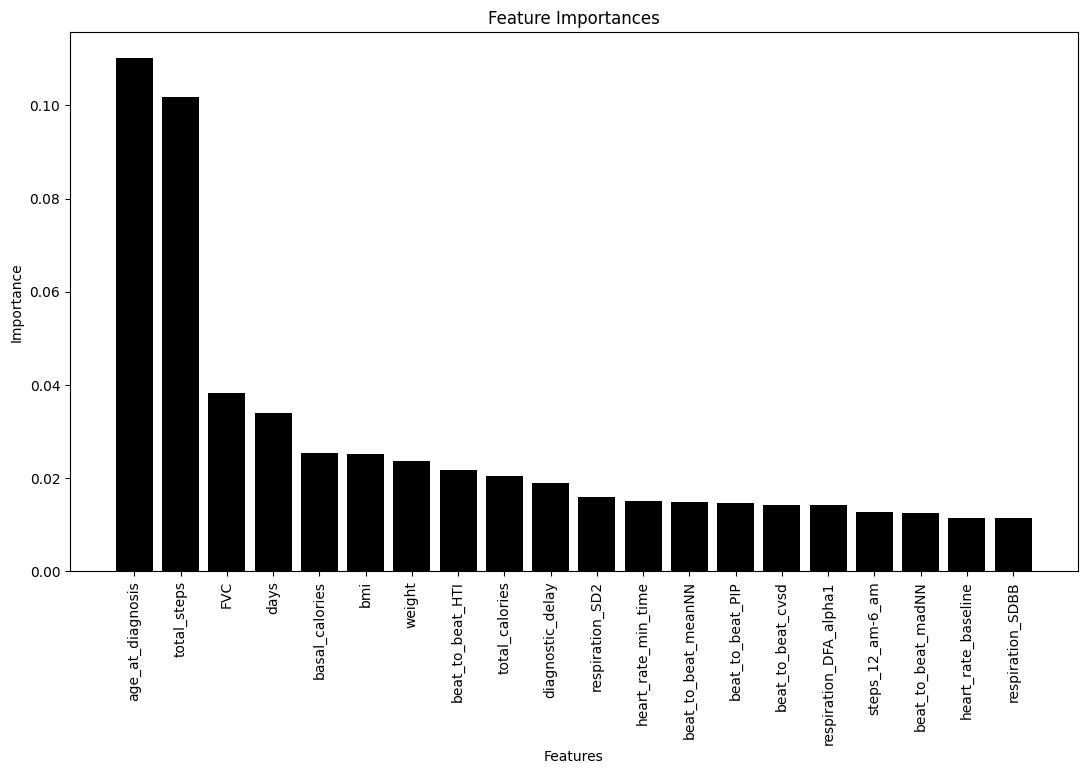

In [35]:
rf = RandomForestRegressor()
rf.fit(x1,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:20]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:20], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [36]:
x=x1[['diagnostic_delay', 'age_at_diagnosis', 'bmi', 'weight', 'total_steps', 'days', 'FVC', 'steps_12_pm-6_pm', 'basal_calories', 'steps_6_am-12_pm', 'heart_rate_r2', 'respiration_SampEn', 'spo2_M', 'beat_to_beat_sdNNI5', 'spo2_CT', 'active_calories', 'total_calories', 'heart_rate_minimum', 'beat_to_beat_cvsd', 'beat_to_beat_PI']]

In [37]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
y

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0
996,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0
997,3.0,4.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,3.0
998,4.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


## ***************SPLITTING INTO TRAINING AND TESTING /MODEL DEVELOPMENT**************

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=42)

## MLP MODEL

In [40]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
rf_pred=np.round((np.clip(rf_pred,0,4))).astype(int)
print('MAE for RandomForest:',mean_absolute_error(rf_pred,y_test))
print('RMSE for RandomForest:',np.sqrt(mean_squared_error(rf_pred,y_test)))
print('R-sqaured value for RandomForest:',r2_score(rf_pred,y_test))

MAE for RandomForest: 0.05145413870246084
RMSE for RandomForest: 0.27781506088347924
R-sqaured value for RandomForest: 0.9053586548925984


In [41]:
bg_model=BaggingRegressor(estimator=DecisionTreeRegressor())
bg_model.fit(x_train,y_train)
bg_pred=bg_model.predict(x_test)
bg_pred=np.round((np.clip(bg_pred,0,4))).astype(int)
print('MAE for Bagging Model:',mean_absolute_error(bg_pred,y_test))
print('RMSE for Bagging Model:',np.sqrt(mean_squared_error(bg_pred,y_test)))
print('R-sqaured value for Bagging Model:',r2_score(bg_pred,y_test))


MAE for Bagging Model: 0.06096196868008947
RMSE for Bagging Model: 0.29820492030924695
R-sqaured value for Bagging Model: 0.8991867102956105


In [42]:
xg_model=XGBRegressor()
xg_model.fit(x_train,y_train)
xg_pred=xg_model.predict(x_test)
xg_pred=np.round((np.clip(xg_pred,0,4))).astype(int)
print('MAE for xgboost:',mean_absolute_error(xg_pred,y_test))
print('RMSE for xgboost:',np.sqrt(mean_squared_error(xg_pred,y_test)))
print('R-sqaured value for xgboost:',r2_score(xg_pred,y_test))

MAE for xgboost: 0.03020134228187919
RMSE for xgboost: 0.21415250999964927
R-sqaured value for xgboost: 0.9491724906462329


In [43]:
model_names=['RandomForest','Bagging Algorithm','XgBoost']
mae_values=[mean_absolute_error(rf_pred,y_test),mean_absolute_error(bg_pred,y_test),mean_absolute_error(xg_pred,y_test)]
rmse_values=[np.sqrt(mean_squared_error(rf_pred,y_test)),np.sqrt(mean_squared_error(bg_pred,y_test)),np.sqrt(mean_squared_error(xg_pred,y_test))]
r2_values=[r2_score(rf_pred,y_test),r2_score(bg_pred,y_test),r2_score(xg_pred,y_test)]
model_scores=pd.DataFrame()
model_scores['Model']=model_names
model_scores['MAE']=mae_values
model_scores['RMSE']=rmse_values
model_scores['R2 score']=r2_values
model_scores

,Model,MAE,RMSE,R2 score
0,RandomForest,0.051454,0.277815,0.905359
1,Bagging Algorithm,0.060962,0.298205,0.899187
2,XgBoost,0.030201,0.214153,0.949172
